# Árovores de decisão
- Uma Árvore de Decisão é um modelo que toma decisões fazendo perguntas de sim ou não, até chegar a uma resposta final.
- Técnicamente, utiliza uma estrutura de dados do tipo árvore, que usa uma estratégia de dividir para conquistar a fim de resolver um problema de decisão, reduzindo o grau de impureza de cada nó até se tornar um nó folha.
- O argoritmo cart utiliza uma árvore binária para implementar o conceito e pode ser usado tanto para a tarefa de classificação quanto para regressão.
- O grau de impureza pode ser medido pelo critério Gini ou Entropia
- A árvore de decisão pode estimar a probabilidade de uma instância pertencer a uma classe
- A complexidade computacional de treinamento é O(n x mlog(m)) e de inferência é O(log(m))
- Para evitar sobreajuste de treinamento, você pode regularizar o modelo usando o parâmetro max_depth (profundidade máxima da árvore)
- Em tarefas de regressão, ao invés de predizer uma classe, o algoritmo prediz um valor baseado na média de valores associadas ao nó folha em questão.
- Apesar de ser um algoritmo simples e poderoso, a árvore de decisão é muito sensível a rotações a pequenas variações na base de treinamento

# treinamento e visualização

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
print("Acurácia:", tree_clf.score(X, y))

Acurácia: 0.96


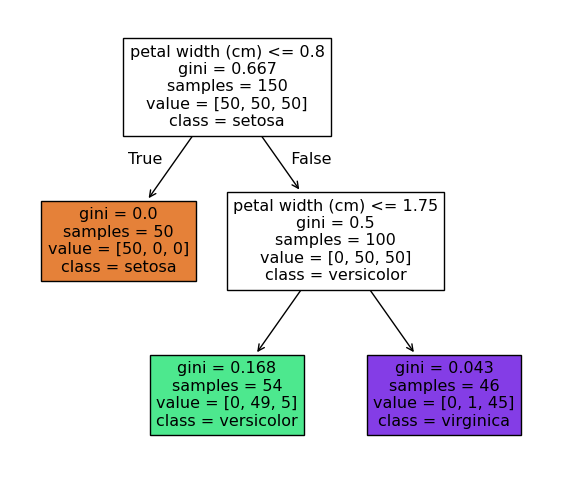

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(7,6))
tree.plot_tree(
    tree_clf,
    feature_names = iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True
)
plt.show()

### Critério Gini
$$G_i = 1 - \sum_{c=1}^n p_{i,c}^2$$

onde $p_{i,c}$ é a razão entre o número de instancias da classe $c$ e as intâncias de treinamento no nó $i$

# Estimando a probabilidade da classe

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

# O algoritmo CART
- Classification and Regression Tree
- Divide o conjunto de treinamento em dois subconjuntos usando um único atributo k e um limiar tk, de acordo com a função custo abaixo

$$J(k,t_k)=\frac{m_{esq}}{m}G_{esq}+\frac{m_{dir}}{m}G_{dir}$$

onde $G_{esq/dir}$ mede o grau de impureza do subconjunto da esquerda ou direita e o $m_{esq/dir}$ é o número de instancias no respectivo subconjunto da esquerda ou direita.

### Entropia

$$ H_i = - \sum_{c=1}^np_{i,c}log_2(p_{i,c})$$

# Parâmetros de regularização
- max_depth: nível de produnfidade da árvore
- min_samples_split: número mínimo de amostras que o nó precisa ter antes da divisão
- min_samples_leaf: número mínimo de amostras que o nó precisa ter
- min_weight_fraction_leaf: fração mínima do total de instâncias que o nó precisa ter
- max_leaf_nodes: número máximo de nós folhas
- max_features: número máximo de atributos que são avaliados para dividir cada nó

# Regressão

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


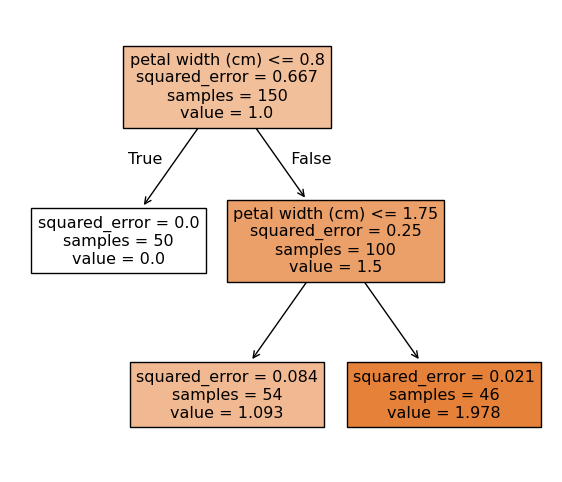

In [27]:
plt.figure(figsize=(7,6))
tree.plot_tree(
    tree_reg,
    feature_names = iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True
)
plt.show()

## função custo CART para a tarefa de regressão

$$J(k,t_k)=\frac{m_{esq}}{m}MSE_{esq}+\frac{m_{dir}}{m}MSE_{dir}$$

$$MSE_{i}=\frac{1}{m}\sum(\hat{y}_i-y_i)$$

$$\hat{y}_i=\frac{1}{m_i}\sum_iy_i$$